# 0. Install and Import Dependencies

In [8]:
!pip install mediapipe opencv-python pandas scikit-learn

# 1. Make Some Detections

In [1]:
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv

In [2]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions

In [3]:
#The code below is to test if the MediaPipe is working or not

In [3]:
cap = cv2.VideoCapture(1)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [4]:
results.face_landmarks.landmark[0].visibility

0.0

# 2. Capture Landmarks & Export to CSV


In [39]:
# Start of training the data

In [40]:
# In this code we're capturing the landmarks and creating a train dataset

In [90]:
import csv
import os
import numpy as np
from datetime import datetime

In [42]:
num_coords = len(results.pose_landmarks.landmark)+len(results.face_landmarks.landmark)
num_coords

501

In [43]:
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [44]:
landmarks


['class',
 'x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 'v32',
 '

In [45]:
#We're going to create a csv file for the train position dataset

In [46]:
with open(r'D:\Disk_Drive\DocumentsBuckUp\360DigiDeepLearning\CapstoneIII\position_train.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [92]:
#We're going to create a datalog of position analysis

In [ ]:
with open(r'D:\Disk_Drive\DocumentsBuckUp\360DigiDeepLearning\CapstoneIII\PostureLog.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow( ['Body Posture', 'DateTime'])

In [114]:
#We're going to create a datalog of position analysis in a jason file

In [113]:
# Data to be written
now = datetime.now()
dtString = now.strftime('%Y-%m-%d %H:%M:%S')

dictionary ={
    "Body Posture" : "Attentive_Posture",
    "DateTime" : dtString,
}
  
# Serializing json 
json_object = json.dumps(dictionary, indent = 2)
  
# Writing to sample.json
with open(r'D:\Disk_Drive\DocumentsBuckUp\360DigiDeepLearning\CapstoneIII\PostureLog.json', "w") as outfile:
    outfile.write(json_object)
    

In [11]:
# We're going to create a classname - change the class_name depending on the posture you want to train,
# For example class_name = Proper_Attentive_Posture, it would create a class of Proper Attentive Posture and
# datalog the corrdinates on the csv file.

In [50]:
class_name = "Improper_Attentive_Posture"

In [51]:
# After assigning a class_name run the code below

In [52]:
cap = cv2.VideoCapture(1)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = pose_row+face_row
            
            # Append class name 
            row.insert(0, class_name)
            
            # Export to CSV
            with open(r'D:\Disk_Drive\DocumentsBuckUp\360DigiDeepLearning\CapstoneIII\position_train.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# 3. Train Custom Model Using Scikit Learn

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [54]:
df = pd.read_csv(r'D:\Disk_Drive\DocumentsBuckUp\360DigiDeepLearning\CapstoneIII\position_train.csv')

In [55]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,Attentive_Posture,0.485982,0.374027,-1.433429,0.999924,0.518831,0.295736,-1.387409,0.999940,0.541214,...,-0.012220,0.0,0.559157,0.295760,0.005774,0.0,0.564428,0.292005,0.005600,0.0
1,Attentive_Posture,0.489155,0.383400,-1.434839,0.999903,0.523430,0.302292,-1.387470,0.999927,0.545674,...,-0.011708,0.0,0.571149,0.305939,0.006803,0.0,0.576064,0.302517,0.006744,0.0
2,Attentive_Posture,0.496171,0.392536,-1.535272,0.999888,0.529682,0.310261,-1.473849,0.999922,0.552211,...,-0.010585,0.0,0.575392,0.311504,0.007622,0.0,0.580101,0.308462,0.007554,0.0
3,Attentive_Posture,0.496731,0.399908,-1.595443,0.999872,0.530982,0.318361,-1.540133,0.999912,0.553331,...,-0.010770,0.0,0.570654,0.317072,0.006661,0.0,0.575229,0.314564,0.006466,0.0
4,Attentive_Posture,0.496668,0.408608,-1.555128,0.999823,0.531164,0.331274,-1.497974,0.999879,0.553293,...,-0.011033,0.0,0.564577,0.324056,0.005975,0.0,0.569205,0.321584,0.005742,0.0


In [56]:
df.tail()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
1012,Improper_Attentive_Posture,0.497686,0.464970,-1.316597,0.999155,0.532170,0.389254,-1.270446,0.998701,0.552252,...,-0.011849,0.0,0.567665,0.366411,0.005209,0.0,0.572493,0.364137,0.004914,0.0
1013,Improper_Attentive_Posture,0.498130,0.464320,-1.336540,0.999232,0.532663,0.388872,-1.289375,0.998824,0.552731,...,-0.011578,0.0,0.568905,0.365675,0.006045,0.0,0.573745,0.363408,0.005800,0.0
1014,Improper_Attentive_Posture,0.498654,0.464169,-1.323108,0.999301,0.533236,0.388773,-1.276519,0.998933,0.553263,...,-0.013318,0.0,0.570394,0.370564,0.004210,0.0,0.575435,0.367544,0.004027,0.0
1015,Improper_Attentive_Posture,0.498544,0.464097,-1.361312,0.999361,0.533398,0.388710,-1.317853,0.999029,0.553462,...,-0.013416,0.0,0.570732,0.372468,0.003929,0.0,0.575761,0.369729,0.003649,0.0
1016,Improper_Attentive_Posture,0.498702,0.463753,-1.369229,0.999418,0.533673,0.387959,-1.325055,0.999117,0.553727,...,-0.012828,0.0,0.570331,0.373195,0.004870,0.0,0.575329,0.370486,0.004653,0.0


In [59]:
df[df['class']=='Improper_Attentive_Posture']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
626,Improper_Attentive_Posture,0.517846,0.425754,-1.622133,0.999952,0.548903,0.363764,-1.579683,0.999913,0.567292,...,-0.008418,0.0,0.573642,0.356414,0.008026,0.0,0.577923,0.354079,0.007928,0.0
627,Improper_Attentive_Posture,0.517620,0.425476,-1.512871,0.999942,0.548832,0.362545,-1.457240,0.999913,0.566769,...,-0.008709,0.0,0.570945,0.354420,0.005866,0.0,0.575206,0.352373,0.005673,0.0
628,Improper_Attentive_Posture,0.491273,0.416038,-1.428113,0.999928,0.530140,0.355353,-1.371634,0.999906,0.549612,...,-0.011181,0.0,0.551277,0.350781,-0.008207,0.0,0.556895,0.345765,-0.008985,0.0
629,Improper_Attentive_Posture,0.470743,0.404164,-1.376143,0.999896,0.513121,0.345249,-1.321968,0.999890,0.534470,...,-0.011145,0.0,0.529327,0.336811,-0.017552,0.0,0.534957,0.333270,-0.019432,0.0
630,Improper_Attentive_Posture,0.451829,0.391393,-1.364315,0.999867,0.497725,0.334394,-1.313260,0.999864,0.520140,...,-0.009279,0.0,0.509668,0.321500,-0.021753,0.0,0.515436,0.316881,-0.024080,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,Improper_Attentive_Posture,0.497686,0.464970,-1.316597,0.999155,0.532170,0.389254,-1.270446,0.998701,0.552252,...,-0.011849,0.0,0.567665,0.366411,0.005209,0.0,0.572493,0.364137,0.004914,0.0
1013,Improper_Attentive_Posture,0.498130,0.464320,-1.336540,0.999232,0.532663,0.388872,-1.289375,0.998824,0.552731,...,-0.011578,0.0,0.568905,0.365675,0.006045,0.0,0.573745,0.363408,0.005800,0.0
1014,Improper_Attentive_Posture,0.498654,0.464169,-1.323108,0.999301,0.533236,0.388773,-1.276519,0.998933,0.553263,...,-0.013318,0.0,0.570394,0.370564,0.004210,0.0,0.575435,0.367544,0.004027,0.0
1015,Improper_Attentive_Posture,0.498544,0.464097,-1.361312,0.999361,0.533398,0.388710,-1.317853,0.999029,0.553462,...,-0.013416,0.0,0.570732,0.372468,0.003929,0.0,0.575761,0.369729,0.003649,0.0


In [60]:
df[df['class']=='Attentive_Posture']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,Attentive_Posture,0.485982,0.374027,-1.433429,0.999924,0.518831,0.295736,-1.387409,0.999940,0.541214,...,-0.012220,0.0,0.559157,0.295760,0.005774,0.0,0.564428,0.292005,0.005600,0.0
1,Attentive_Posture,0.489155,0.383400,-1.434839,0.999903,0.523430,0.302292,-1.387470,0.999927,0.545674,...,-0.011708,0.0,0.571149,0.305939,0.006803,0.0,0.576064,0.302517,0.006744,0.0
2,Attentive_Posture,0.496171,0.392536,-1.535272,0.999888,0.529682,0.310261,-1.473849,0.999922,0.552211,...,-0.010585,0.0,0.575392,0.311504,0.007622,0.0,0.580101,0.308462,0.007554,0.0
3,Attentive_Posture,0.496731,0.399908,-1.595443,0.999872,0.530982,0.318361,-1.540133,0.999912,0.553331,...,-0.010770,0.0,0.570654,0.317072,0.006661,0.0,0.575229,0.314564,0.006466,0.0
4,Attentive_Posture,0.496668,0.408608,-1.555128,0.999823,0.531164,0.331274,-1.497974,0.999879,0.553293,...,-0.011033,0.0,0.564577,0.324056,0.005975,0.0,0.569205,0.321584,0.005742,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,Attentive_Posture,0.494558,0.432737,-1.230967,0.999770,0.533249,0.363776,-1.159324,0.999789,0.554489,...,-0.008378,0.0,0.564585,0.343307,0.008130,0.0,0.569306,0.341239,0.008103,0.0
622,Attentive_Posture,0.496011,0.432772,-1.286010,0.999781,0.534303,0.363799,-1.217147,0.999799,0.556336,...,-0.009087,0.0,0.569216,0.343145,0.008213,0.0,0.573855,0.341237,0.008161,0.0
623,Attentive_Posture,0.497846,0.432691,-1.258661,0.999791,0.535743,0.363633,-1.182128,0.999811,0.558656,...,-0.008256,0.0,0.571531,0.346230,0.009393,0.0,0.576084,0.344232,0.009439,0.0
624,Attentive_Posture,0.498978,0.433458,-1.220273,0.999803,0.536689,0.363937,-1.151774,0.999823,0.560128,...,-0.009225,0.0,0.574263,0.348303,0.008305,0.0,0.578882,0.346413,0.008301,0.0


In [61]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)


In [63]:
y_test


99              Attentive_Posture
146             Attentive_Posture
422             Attentive_Posture
846    Improper_Attentive_Posture
60              Attentive_Posture
                  ...            
187             Attentive_Posture
387             Attentive_Posture
216             Attentive_Posture
897    Improper_Attentive_Posture
96              Attentive_Posture
Name: class, Length: 306, dtype: object

In [64]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [65]:

pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [73]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [74]:
fit_models


{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [75]:
fit_models['rc'].predict(X_test)


array(['Attentive_Posture', 'Attentive_Posture', 'Attentive_Posture',
       'Improper_Attentive_Posture', 'Attentive_Posture',
       'Improper_Attentive_Posture', 'Improper_Attentive_Posture',
       'Attentive_Posture', 'Attentive_Posture', 'Attentive_Posture',
       'Attentive_Posture', 'Attentive_Posture',
       'Improper_Attentive_Posture', 'Attentive_Posture',
       'Attentive_Posture', 'Attentive_Posture', 'Attentive_Posture',
       'Attentive_Posture', 'Attentive_Posture',
       'Improper_Attentive_Posture', 'Attentive_Posture',
       'Improper_Attentive_Posture', 'Attentive_Posture',
       'Improper_Attentive_Posture', 'Attentive_Posture',
       'Improper_Attentive_Posture', 'Attentive_Posture',
       'Improper_Attentive_Posture', 'Improper_Attentive_Posture',
       'Improper_Attentive_Posture', 'Attentive_Posture',
       'Attentive_Posture', 'Attentive_Posture', 'Attentive_Posture',
       'Improper_Attentive_Posture', 'Attentive_Posture',
       'Attentive_Postur

In [76]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle

In [77]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 1.0
rc 1.0
rf 0.9967320261437909
gb 0.9934640522875817


In [78]:
fit_models['rf'].predict(X_test)


array(['Attentive_Posture', 'Attentive_Posture', 'Attentive_Posture',
       'Improper_Attentive_Posture', 'Attentive_Posture',
       'Attentive_Posture', 'Improper_Attentive_Posture',
       'Attentive_Posture', 'Attentive_Posture', 'Attentive_Posture',
       'Attentive_Posture', 'Attentive_Posture',
       'Improper_Attentive_Posture', 'Attentive_Posture',
       'Attentive_Posture', 'Attentive_Posture', 'Attentive_Posture',
       'Attentive_Posture', 'Attentive_Posture',
       'Improper_Attentive_Posture', 'Attentive_Posture',
       'Improper_Attentive_Posture', 'Attentive_Posture',
       'Improper_Attentive_Posture', 'Attentive_Posture',
       'Improper_Attentive_Posture', 'Attentive_Posture',
       'Improper_Attentive_Posture', 'Improper_Attentive_Posture',
       'Improper_Attentive_Posture', 'Attentive_Posture',
       'Attentive_Posture', 'Attentive_Posture', 'Attentive_Posture',
       'Improper_Attentive_Posture', 'Attentive_Posture',
       'Attentive_Posture', 'Impr

In [79]:
y_test


99              Attentive_Posture
146             Attentive_Posture
422             Attentive_Posture
846    Improper_Attentive_Posture
60              Attentive_Posture
                  ...            
187             Attentive_Posture
387             Attentive_Posture
216             Attentive_Posture
897    Improper_Attentive_Posture
96              Attentive_Posture
Name: class, Length: 306, dtype: object

In [80]:
# Save the model created

In [81]:
with open(r'D:\Disk_Drive\DocumentsBuckUp\360DigiDeepLearning\CapstoneIII\body_language.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

In [82]:
#Space Model Creation Is Complted Until This Code

# 4. Code for Deployment

In [1]:
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv

In [2]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions

In [3]:
import csv
import os
import numpy as np
from datetime import datetime
import pandas as pd

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle

In [6]:
# Load the model created

In [7]:
with open(r'D:\Disk_Drive\DocumentsBuckUp\360DigiDeepLearning\CapstoneIII\body_language.pkl', 'rb') as f:
    model = pickle.load(f)

In [8]:
# Function to Log the Position

In [9]:
def markPosture(body_language_class):
    with open(r'D:\Disk_Drive\DocumentsBuckUp\360DigiDeepLearning\CapstoneIII\PostureLog.csv','r+') as f:
        myDataList = f.readlines()
        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])  
        now = datetime.now()
        dtString = now.strftime('%Y-%m-%d %H:%M:%S')
        f.writelines(f'\n{body_language_class}, {dtString}')

In [10]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [12]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = pose_row+face_row
            
#             # Append class name 
#             row.insert(0, class_name)
            
#             # Export to CSV
#             with open('coords.csv', mode='a', newline='') as f:
#                 csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                 csv_writer.writerow(row) 

            # Make Detections
            X = pd.DataFrame([row])
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]
            
            print(body_language_class, body_language_prob)
            
            # Posture DataLog 
            markPosture(body_language_class)
            
            # Grab ear coords
            coords = tuple(np.multiply(
                            np.array(
                                (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
                                 results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
                        , [640,480]).astype(int))
            
            cv2.rectangle(image, 
                          (coords[0], coords[1]+5), 
                          (coords[0]+len(body_language_class)*20, coords[1]-30), 
                          (245, 117, 16), -1)
            cv2.putText(image, body_language_class, coords, 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Get status box
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)
        
        #markPosture(body_language_class)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

Improper_Attentive_Posture [0.05 0.95]
Improper_Attentive_Posture [0.03 0.97]
Improper_Attentive_Posture [0.03 0.97]
Improper_Attentive_Posture [0.03 0.97]
Improper_Attentive_Posture [0.03 0.97]
Improper_Attentive_Posture [0.03 0.97]
Improper_Attentive_Posture [0.04 0.96]
Improper_Attentive_Posture [0.06 0.94]
Improper_Attentive_Posture [0.1 0.9]
Improper_Attentive_Posture [0.13 0.87]
Improper_Attentive_Posture [0.15 0.85]
Improper_Attentive_Posture [0.25 0.75]
Improper_Attentive_Posture [0.32 0.68]
Improper_Attentive_Posture [0.28 0.72]
Improper_Attentive_Posture [0.4 0.6]
Improper_Attentive_Posture [0.39 0.61]
Improper_Attentive_Posture [0.32 0.68]
Improper_Attentive_Posture [0.25 0.75]
Improper_Attentive_Posture [0.18 0.82]
Improper_Attentive_Posture [0.15 0.85]
Improper_Attentive_Posture [0.13 0.87]
Improper_Attentive_Posture [0.09 0.91]
Improper_Attentive_Posture [0.13 0.87]
Improper_Attentive_Posture [0.15 0.85]
Improper_Attentive_Posture [0.15 0.85]
Improper_Attentive_Posture [0

# 5. Image Capture

In [1]:
## Import the Mediapipe Library and OpenCV for image detection and holistic body posture detection

In [2]:
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv

mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions

In [3]:
## Import the Basic Library 

In [4]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import json
from datetime import datetime

In [5]:
## Import Scikit-Learn Library for Machine Learning

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # Accuracy metrics 

In [7]:
## Load the pre-trained Model (Note: The pretrained model can be improved by re-training. Re-training code is
## located at step 1 to step 3.)

In [8]:
with open(r'D:\Disk_Drive\DocumentsBuckUp\360DigiDeepLearning\CapstoneIII\body_language.pkl', 'rb') as f:
    model = pickle.load(f)

In [9]:
## Function to Log the Position to a json file

In [46]:
def markPosture_json(new_data):
    now = datetime.now()
    dtString = now.strftime('%Y-%m-%d %H:%M:%S')

    dictionary ={
        "Body Posture" : new_data,
        "DateTime" : dtString,
                }
    # Serializing json 
    json_object = json.dumps(dictionary, indent = 4)
    
    with open(r'D:\Disk_Drive\DocumentsBuckUp\360DigiDeepLearning\CapstoneIII\PostureLog.json', "a") as outfile:
        outfile.write(json_object)

In [11]:
## Calling the Model

In [12]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [13]:
## The Code to start the Image Posture detection

In [79]:
img = cv2.imread(r'C:\Users\ASHNER_NOVILLA\Pictures\Camera Roll\Site5.jpg')
#Use Site6 image for Improper attentive posture

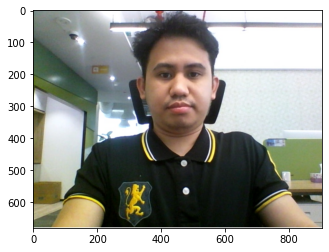

In [80]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [81]:
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        
        # Recolor Feed
        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
                        
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = pose_row+face_row
            
#             # Append class name 
#             row.insert(0, class_name)
            
#             # Export to CSV
#             with open('coords.csv', mode='a', newline='') as f:
#                 csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                 csv_writer.writerow(row) 

            # Make Detections
            X = pd.DataFrame([row])
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]
            
            print(body_language_class, body_language_prob)

            # Get status box
            cv2.rectangle(image, (0,0), (550, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        except:
            pass
        
                    
# Posture DataLog in csv
        markPosture(body_language_class)
            
# Posture DataLog in json
        markPosture_json(body_language_class)
                     

Attentive_Posture [0.6 0.4]


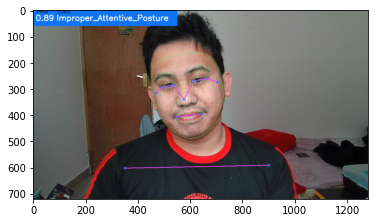

In [78]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

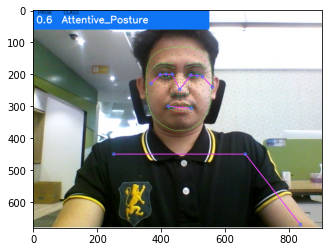

In [82]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))